# T-Test Practice: One-Sample & Independent Samples
This notebook demonstrates T-Test for hypothesis testing:
- One-sample t-test (one-tailed & two-tailed)
- Independent two-sample t-test
- Visualizations to understand rejection regions and group differences


### **T-TEST ONE SAMPLE
Example: A teacher claims the average exam score = 75.
Sample of 10 students has mean = 80.
Check if students scored **significantly higher than 75** (one-tailed test).


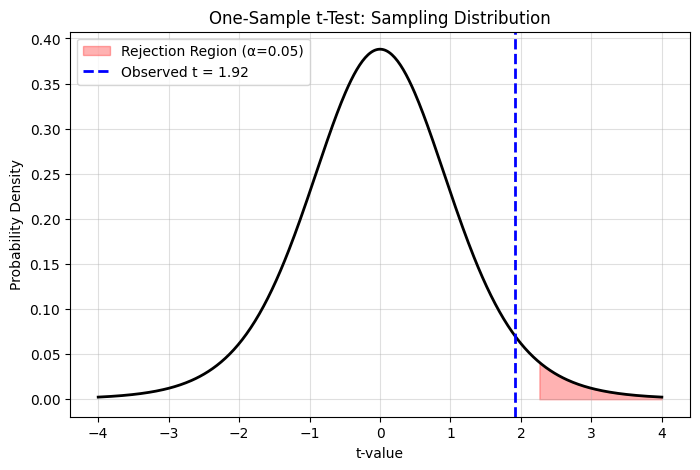

In [8]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML
data=[65,70,76,75,80,86,77,56,98,96]
#T-test
t_test,p_value=stats.ttest_1samp(a=data,popmean=75)
display(HTML(f"<b style='color:skyblue;'>t_test: {t_test}</b><br>"))
display(HTML(f"<b style='color:skyblue;'>p_value: {p_value}</b>"))
#Interpretation
if p_value < 0.05:
    display(HTML("<b style='color:green;'>✅ We reject the null hypothesis — the sample mean differs significantly from 75.</b>"))
else:
    display(HTML("<b style='color:red;'>❌ We fail to reject the null hypothesis — no significant difference from 75.</b>"))
# --- Step 4: Visualization ---
df = len(data) - 1  # degrees of freedom
x = np.linspace(-4, 4, 400)
y = stats.t.pdf(x, df)

plt.figure(figsize=(8,5))
plt.plot(x, y, color='black', lw=2)

# Critical values for two-tailed test (alpha = 0.05)
t_critical = stats.t.ppf(1 - 0.025, df)

# Shade rejection regions
x_reject = np.linspace(t_critical, 4, 200)
plt.fill_between(x_reject, stats.t.pdf(x_reject, df), color='red', alpha=0.3, label='Rejection Region (α=0.05)')

# Plot observed t-statistic
plt.axvline(t_test, color='blue', linestyle='--', lw=2, label=f'Observed t = {t_test:.2f}')

# Labels
plt.title("One-Sample t-Test: Sampling Distribution", fontsize=12)
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

### **TWO TAILED T-TEST VISUALIZATION

Check if students scored **differently from 75** (could be higher or lower). Two-tailed test.


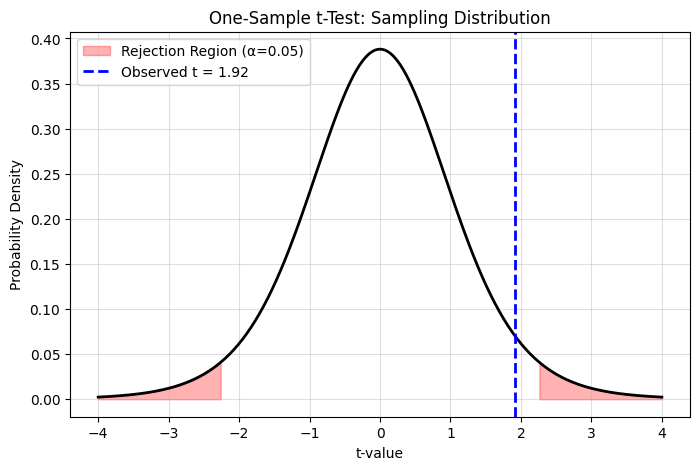

In [7]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML
data=[65,70,76,75,80,86,77,56,98,96]
#T-test
t_test,p_value=stats.ttest_1samp(a=data,popmean=70)
display(HTML(f"<b style='color:skyblue;'>t_test: {t_test}</b><br>"))
display(HTML(f"<b style='color:skyblue;'>p_value: {p_value}</b>"))
#Interpretation
if p_value < 0.05:
    display(HTML("<b style='color:green;'>✅ We reject the null hypothesis — the sample mean differs significantly from 75.</b>"))
else:
    display(HTML("<b style='color:red;'>❌ We fail to reject the null hypothesis — no significant difference from 75.</b>"))
# --- Step 4: Visualization ---
df = len(data) - 1  # degrees of freedom
x = np.linspace(-4, 4, 400)
y = stats.t.pdf(x, df)

plt.figure(figsize=(8,5))
plt.plot(x, y, color='black', lw=2)

# Critical values for two-tailed test (alpha = 0.05)
t_critical = stats.t.ppf(1 - 0.025, df)

# Shade rejection regions
x_left = np.linspace(-4, -t_critical, 200)
x_right = np.linspace(t_critical, 4, 200)
plt.fill_between(x_left, stats.t.pdf(x_left, df), color='red', alpha=0.3, label='Rejection Region (α=0.05)')
plt.fill_between(x_right, stats.t.pdf(x_right, df), color='red', alpha=0.3)

# Plot observed t-statistic
plt.axvline(t_test, color='blue', linestyle='--', lw=2, label=f'Observed t = {t_test:.2f}')

# Labels
plt.title("One-Sample t-Test: Sampling Distribution", fontsize=12)
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

### **INDEPENDENT SAMPLE T-TEST**
Compare scores of two independent groups:
- Male scores: [75, 78, 80, 72, 70]
- Female scores: [82, 85, 79, 88, 90]

Check if **male and female scores differ significantly**.


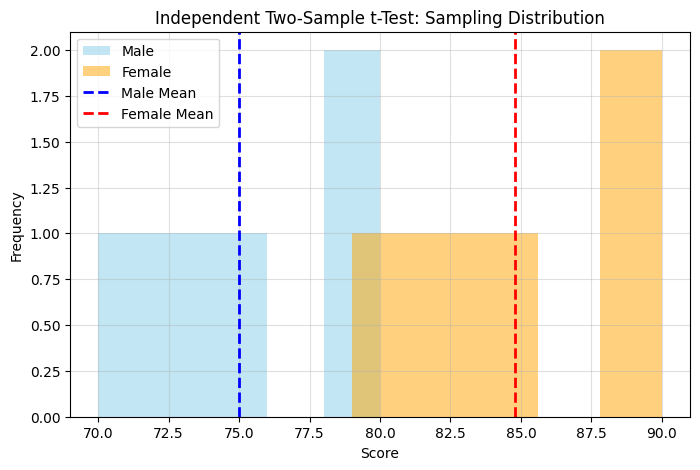

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display , HTML

#sample data
male_scores=[75,78,80,72,70]
female_scores=[82,85,79,88,90]

#independent two test sample(assume equal variance)
t_test,p_value=stats.ttest_ind(a=male_scores,b=female_scores,equal_var=True)
display(HTML(f"<b style='color:skyblue;'>t_test: {t_test}</b>"))
display(HTML(f"<b style='color:skyblue;'>p_value: {p_value}</b>"))

#interpretation
if p_value<0.05:
  display(HTML("<b style='color:green;'>✅ We reject the null hypothesis — there is a significant difference.</b>"))
else:
  display(HTML("<b style='color:red;'>❌ We fail to reject the null hypothesis — no significant difference.</b>"))

#VISUALIZATION
plt.figure(figsize=(8,5))
plt.hist(male_scores,bins=5,color='skyblue',alpha=0.5,label='Male')
plt.hist(female_scores,bins=5,color='orange',alpha=0.5,label='Female')
#plot mean
plt.axvline(np.mean(male_scores),color='blue',linestyle='dashed',linewidth=2,label='Male Mean')
plt.axvline(np.mean(female_scores),color='red',linestyle='--',linewidth=2,label='Female Mean')

#labels
plt.title("Independent Two-Sample t-Test: Sampling Distribution",fontsize=12)
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.4)
plt.show()

### **SUMMARY**
- One-sample vs Independent-sample t-tests
- One-tailed vs Two-tailed tests
- How to interpret p-value and t-statistic
- Visualizations reinforce conclusions
